# Project: Prediction of NO2 emissions in Zurich

## Machine learning model: ridge regression

### 1) Identify and discuss ridge regression model, baseline, metrics and evaluation strategy

#### Ridge regression

Ridge regression, also known as L2 regularization is one of several types of regularization for linear regression models. L2 regularization means that ridge regression adds penalty equivalent to the square of the magnitude of coefficients. 

Hyperparameter alpha, the regularization strength, is the penalty term. Alpha regulates how much each of the main parameters in the model can contribute to the fit. In general, regularization is needed to ensure that the model can generalize well on the unseen data.

The optimal alpha value is chosen with the grid search technique by iterating over a list of alpha values and taking the one with the best validation score. 

#### Baseline

The median value of the target feature (NO2) will be used for the baseline model.

#### Metrics

Mean absolute error (MAE) will be used for the metrics.

#### Evaluation

Model will be evaluated and compared with MAE, the mean of absolute differences between predicted and actual values of NO2 for the baseline and ridge regression model.

### 2) Tune ridge regression model and analyze it's performance

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.compose import TransformedTargetRegressor

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load the data
train = pd.read_csv("train.csv", index_col=0, parse_dates=True)
test = pd.read_csv("test.csv", index_col=0, parse_dates=True)

In [4]:
# show first 5 entries for the training dataset
train.head()

,NO2,RainDur,PH,SH,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,37.71,0,1,1,0.000000,1.000000,-0.781831,0.62349,0.0,1.0,3.807773,2.542389,0.683097,4.079738,0.314811,1.040277,87.47,-1.27,283.62,0.708036,977.72,0.04
2017-01-01 01:00:00,39.50,0,1,1,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,3.656098,2.343727,0.896088,4.671707,0.307485,1.442202,87.41,-1.65,292.05,0.858662,977.22,0.03
2017-01-01 02:00:00,38.53,0,1,1,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,3.701302,2.790551,0.854415,4.467057,0.314811,1.091923,87.13,-2.07,296.76,0.746688,976.62,0.04
2017-01-01 03:00:00,39.24,0,1,1,0.707107,0.707107,-0.781831,0.62349,0.0,1.0,3.677060,2.467252,0.703098,4.367928,0.307485,1.029619,86.82,-2.05,281.18,0.620576,976.16,0.03
2017-01-01 04:00:00,41.89,0,1,1,0.866025,0.500000,-0.781831,0.62349,0.0,1.0,3.694862,2.438863,0.932164,4.227709,0.307485,0.947789,87.26,-1.95,257.22,0.530628,975.58,0.03


In [5]:
# show first 5 entries of the test dataset
test.head()

,NO2,RainDur,PH,SH,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,15.28,1,0,0,0.000000,1.000000,-0.433884,-0.900969,-0.5,0.866025,3.077773,1.190888,3.768845,2.143589,0.254642,0.357674,84.48,1.73,200.95,0.974560,956.71,0.03
2017-12-01 01:00:00,9.08,1,0,0,0.258819,0.965926,-0.433884,-0.900969,-0.5,0.866025,2.789937,0.824175,3.921181,1.968510,0.239017,0.336472,85.25,1.45,210.79,1.163151,956.62,0.03
2017-12-01 02:00:00,9.02,1,0,0,0.500000,0.866025,-0.433884,-0.900969,-0.5,0.866025,2.310553,0.307485,4.093177,1.528228,0.215111,0.329304,84.43,1.23,240.39,1.335001,956.50,0.02
2017-12-01 03:00:00,10.20,1,0,0,0.707107,0.707107,-0.433884,-0.900969,-0.5,0.866025,2.304583,0.157004,4.189958,1.504077,0.198851,0.307485,88.81,0.12,277.34,0.996949,957.39,0.04
2017-12-01 04:00:00,17.17,0,0,0,0.866025,0.500000,-0.433884,-0.900969,-0.5,0.866025,2.415914,0.350657,4.211387,1.472472,0.190620,0.392042,85.41,-0.14,251.82,0.746688,957.66,0.02


In [6]:
# size of the training dataset
print("Train:", train.shape)

# size of the test dataset
print("Test: ", test.shape)

Train: (8016, 22)
Test:  (744, 22)


Training dataset contains 11 months of data (hourly measurements), from  January to November 2017. Test dataset contains 1 month of data (hourly measurements), December 2017.

Both datasets contain 22 columns:
- target feature (NO2)
- rain duration (RainDur)
- public holiday (PH)
- school holiday (SH)
- cyclically encoded features for hour, day and month (6 columns)
- 6 lagged air quality features (NO2_lag1, NO_lag1, O3_lag1, PM10_lag1, CO_lag1, SO2_lag1)
- 6 lagged meteorological features (Hr_lag1, T_lag1, WD_lag1, WVv_lag1, p_lag1, StrGlo_lag1)

In [7]:
# one-hot encoding for the RainDur, PH and SH
train = pd.get_dummies(train, columns=['RainDur', 'PH', 'SH'])
test = pd.get_dummies(test, columns=['RainDur', 'PH', 'SH'])

In [8]:
# show first 5 entries of the training dataset
train.head()

,NO2,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1,RainDur_0,RainDur_1,PH_0,PH_1,SH_0,SH_1
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,37.71,0.000000,1.000000,-0.781831,0.62349,0.0,1.0,3.807773,2.542389,0.683097,4.079738,0.314811,1.040277,87.47,-1.27,283.62,0.708036,977.72,0.04,1,0,0,1,0,1
2017-01-01 01:00:00,39.50,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,3.656098,2.343727,0.896088,4.671707,0.307485,1.442202,87.41,-1.65,292.05,0.858662,977.22,0.03,1,0,0,1,0,1
2017-01-01 02:00:00,38.53,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,3.701302,2.790551,0.854415,4.467057,0.314811,1.091923,87.13,-2.07,296.76,0.746688,976.62,0.04,1,0,0,1,0,1
2017-01-01 03:00:00,39.24,0.707107,0.707107,-0.781831,0.62349,0.0,1.0,3.677060,2.467252,0.703098,4.367928,0.307485,1.029619,86.82,-2.05,281.18,0.620576,976.16,0.03,1,0,0,1,0,1
2017-01-01 04:00:00,41.89,0.866025,0.500000,-0.781831,0.62349,0.0,1.0,3.694862,2.438863,0.932164,4.227709,0.307485,0.947789,87.26,-1.95,257.22,0.530628,975.58,0.03,1,0,0,1,0,1


In [9]:
# show first 5 entries of the test dataset
test.head()

,NO2,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1,RainDur_0,RainDur_1,PH_0,PH_1,SH_0,SH_1
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,15.28,0.000000,1.000000,-0.433884,-0.900969,-0.5,0.866025,3.077773,1.190888,3.768845,2.143589,0.254642,0.357674,84.48,1.73,200.95,0.974560,956.71,0.03,0,1,1,0,1,0
2017-12-01 01:00:00,9.08,0.258819,0.965926,-0.433884,-0.900969,-0.5,0.866025,2.789937,0.824175,3.921181,1.968510,0.239017,0.336472,85.25,1.45,210.79,1.163151,956.62,0.03,0,1,1,0,1,0
2017-12-01 02:00:00,9.02,0.500000,0.866025,-0.433884,-0.900969,-0.5,0.866025,2.310553,0.307485,4.093177,1.528228,0.215111,0.329304,84.43,1.23,240.39,1.335001,956.50,0.02,0,1,1,0,1,0
2017-12-01 03:00:00,10.20,0.707107,0.707107,-0.433884,-0.900969,-0.5,0.866025,2.304583,0.157004,4.189958,1.504077,0.198851,0.307485,88.81,0.12,277.34,0.996949,957.39,0.04,0,1,1,0,1,0
2017-12-01 04:00:00,17.17,0.866025,0.500000,-0.433884,-0.900969,-0.5,0.866025,2.415914,0.350657,4.211387,1.472472,0.190620,0.392042,85.41,-0.14,251.82,0.746688,957.66,0.02,1,0,1,0,1,0


In [10]:
# size of the training dataset
print("Train:", train.shape)

# size of the test dataset
print("Test: ", test.shape)

Train: (8016, 25)
Test:  (744, 25)


Training dataset has 8016 rows and 25 columns. Test dataset has 744 rows and 25 columns. There are 3 more columns in both datasets because of one-hot encoding that was applied to public holiday (PH), school holiday (SH) and rain duration (RainDur). 

In [11]:
# specify features and target for the training set
X = train.drop(["NO2"], axis=1).values
y = train["NO2"]

# specify features and target for the test set
X_te = test.drop('NO2', axis=1).values
y_te = test["NO2"]

In [12]:
# baseline
baseline = MAE(y_te, np.median(y) * np.ones(len(y_te)))
print("baseline MAE: {:.2f}".format(baseline))

baseline MAE: 15.93


The MAE score of the baseline is 15.93  µg/m3. Median was used to calculate the baseline.

In [13]:
# ridge regression: hyperparameter tuning with cross-validation

# alpha (tuning values)
alpha_values = np.logspace(-4, 4, num=20)

# variable to store the grid search results
gs_results = []

# grid search
for alpha in alpha_values:

    # pipeline
    pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha))])
    
    # model with target transformation
    model_ridge = TransformedTargetRegressor(regressor=pipeline, 
                                             func=np.log1p, 
                                             inverse_func=np.expm1)
    
    # cross-validation object
    cv = TimeSeriesSplit(n_splits=5, test_size=24 * 30 * 1)
    
    # split train set into training and validation sets with 5 splits
    for tr, val in cv.split(X):
        X_tr, X_val = X[tr], X[val]
        y_tr, y_val = y[tr], y[val]
     
        # fit the model
        model_ridge.fit(X_tr, y_tr)

        # save the results of model performance on training and validation sets
        gs_results.append(
            {"alpha": alpha,
             "train_mae": MAE(y_tr, model_ridge.predict(X_tr)),
             "validation_mae": MAE(y_val, model_ridge.predict(X_val))
            }
        )

Pipeline consists of the standard scaler and ridge regression. 

Ridge regression was tuned with 20 values of the alpha hyperparameter in the range from 0.0001 to 10'000.

TranformedTargetRegressor was used for the log transformation (log1p) of the target (NO2).

Cross-validation object (cv) was created with the TimeSeriesSplit. The number of splits is 5 and the validation set is 1 month (24 hours multiplied by 30 days).

Training and validation MAE scores with corresponding alpha values were saved in the grid search results.

In [14]:
# convert grid search results to dataframe
gs_results = pd.DataFrame(gs_results)

# sort grid search results by the mean validation mae score
gs_results.groupby(['alpha']).mean().sort_values(by="validation_mae", ascending=True).head()

,train_mae,validation_mae
alpha,,
4.281332,5.467453,5.327303
1.623777,5.467423,5.327370
11.288379,5.467847,5.327411
0.615848,5.467434,5.327416
0.233572,5.467441,5.327436


The smallest mean validation error is 5.33 µg/m3 which is 3% lower than the mean training error of 5.47 µg/m3.

The optimal alpha is 4.28.

In [15]:
# optimal alpha value
best_alpha = gs_results.groupby("alpha")["validation_mae"].mean().idxmin()

In [16]:
# standard deviation of the training error for best alpha
gs_results[gs_results['alpha']==best_alpha]['train_mae'].std().round(4)

0.0314

In [17]:
# standard deviation of the validation error for best alpha
gs_results[gs_results['alpha']==best_alpha]['validation_mae'].std().round(4)

0.2476

Standard deviation of the validation error is 0.25 which is around 8x higher that the standard deviation of the training error (0.03). The cross-validation showed that the model is not robust when exposed to unseen data.

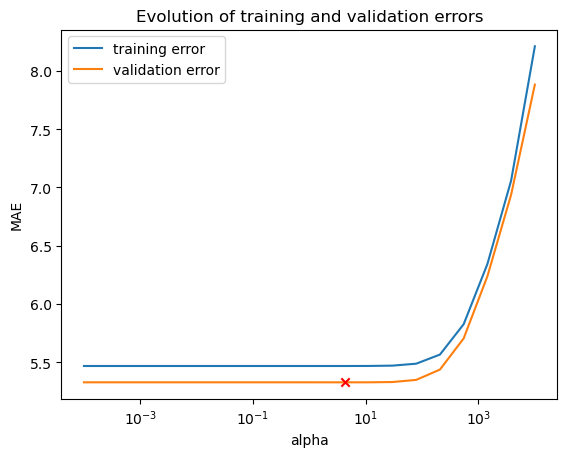

In [18]:
# plot the training error against alpha
plt.semilogx(gs_results.groupby("alpha")["train_mae"].mean().index, 
             gs_results.groupby("alpha")["train_mae"].mean().values, 
             label="training error")

# plot the validation error against alpha
plt.semilogx(gs_results.groupby("alpha")["validation_mae"].mean().index, 
             gs_results.groupby("alpha")["validation_mae"].mean().values, 
             label="validation error")

# mark optimal alpha value
plt.scatter(gs_results.groupby("alpha")["validation_mae"].mean().idxmin(),
            gs_results.groupby("alpha")["validation_mae"].mean().min(),
            marker="x", c="red", zorder=10)

plt.title("Evolution of training and validation errors")
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.legend()
plt.show()

Training and validation errors plotted against alpha show that mean validation error is lower than the mean training error. This is usually not the case.

The grid search results for alpha values between 1 and 100 (see below) show that validation error is lower than the training error in the 1st, 2nd, 3rd and 5th split. Only the 4th split has validation error higher than the training error.

The reason for the validation error being lower than the training error is that validation sets do not capture the full complexity of the data. This can be seen in the graph below showing training and validation sets.

In [19]:
# grid search results for alpha values between 1 and 100
gs_results[(gs_results['alpha']>1) & (gs_results['alpha']<100)]

,alpha,train_mae,validation_mae
50,1.623777,5.512785,5.144576
51,1.623777,5.471205,5.386912
52,1.623777,5.468657,5.075624
53,1.623777,5.425188,5.708985
54,1.623777,5.459280,5.320755
55,4.281332,5.512854,5.144082
56,4.281332,5.471329,5.386376
57,4.281332,5.468683,5.077556
58,4.281332,5.425177,5.709057
59,4.281332,5.459219,5.319445


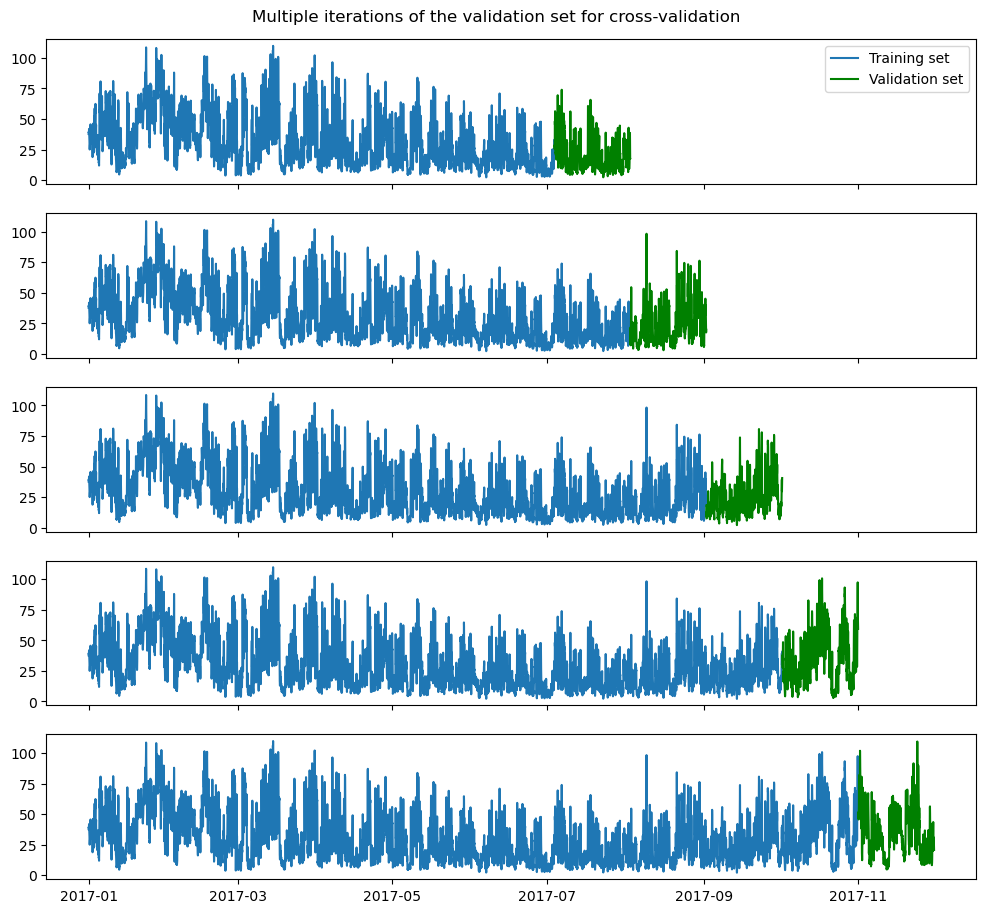

In [20]:
# plot iterations of the training and validation sets

# number of subplots and setting the size
fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True, sharey=True)

# cross-validation object
cv = TimeSeriesSplit(n_splits=5, test_size=24 * 30 * 1)

for (i, (tr, val)), ax in zip(enumerate(cv.split(y)), axes.ravel()):

    # plot training and validation sets
    ax.plot(train["NO2"][tr], label="Training set")
    ax.plot(train["NO2"][val], label="Validation set", color="g")

axes[0].legend()
plt.subplots_adjust(top=0.95)
plt.suptitle("Multiple iterations of the validation set for cross-validation")
plt.show()

Validation sets do not capture the full complexity of the data, as seen in the graph above. This is particularly visible in the 1st and 3rd validation sets, when compared to the corresponding training sets.

In [21]:
# pipeline with tuned ridge regression
tuned_pipeline = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=best_alpha))])
    
# tuned model with target transformation
tuned_model_ridge = TransformedTargetRegressor(regressor=tuned_pipeline, 
                                               func=np.log1p, 
                                               inverse_func=np.expm1)

# fit tuned ridge regression on the full training dataset
tuned_model_ridge.fit(X, y)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('model',
                                                      Ridge(alpha=4.281332398719396))]))

In [22]:
# evaluate on the test set
y_pred_ridge = tuned_model_ridge.predict(X_te)

ridge_mae = MAE(y_te, y_pred_ridge)
print("ridge MAE: {:.2f}".format(ridge_mae))

ridge MAE: 4.94


The MAE score of the tuned ridge regression model is 4.94 µg/m3 which is significantly lower than the baseline of 15.93 µg/m3.

### 3) Discuss the results and potential trade-offs

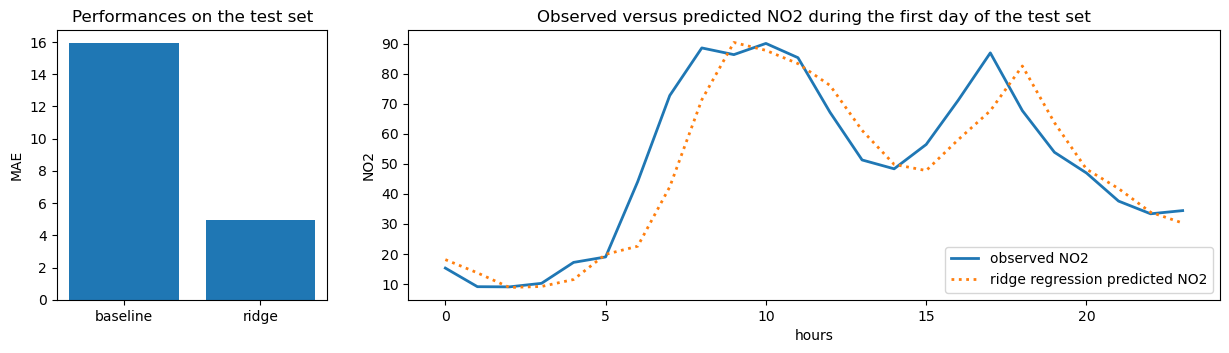

In [23]:
# plots with MAE scores and observed and predicted NO2 on the first day of the test

# defining the number of subplots and setting the size
fig, axes = plt.subplots(
    1, 2, figsize=(15, 3.5), gridspec_kw={"wspace": 0.15, "width_ratios": [1, 3]}
)

# plot with MAE scores of the baseline and ridge regression model
axes[0].bar(np.arange(2), [baseline, ridge_mae])
axes[0].set_xticks(np.arange(2))
axes[0].set_xticklabels(("baseline", "ridge"))
axes[0].set_ylabel("MAE")
axes[0].set_title("Performances on the test set")

# plot with observed and predicted values during the first day of the test set
axes[1].plot(y_te.values[:24], lw=2, label="observed NO2")
axes[1].plot(y_pred_ridge[:24], ls=":", lw=2, label="ridge regression predicted NO2")

axes[1].set_title("Observed versus predicted NO2 during the first day of the test set")
axes[1].set_xlabel("hours")
axes[1].set_ylabel("NO2")
axes[1].legend()

plt.show()

The MAE score of the ridge regression model (4.94 µg/m3) is 3x lower than the baseline of 15.93 µg/m3.

The first day of the test set, Friday, December 1, 2017, shows underpredictions in the morning and afternoon hours, and overpredictions around noon and in the evening.

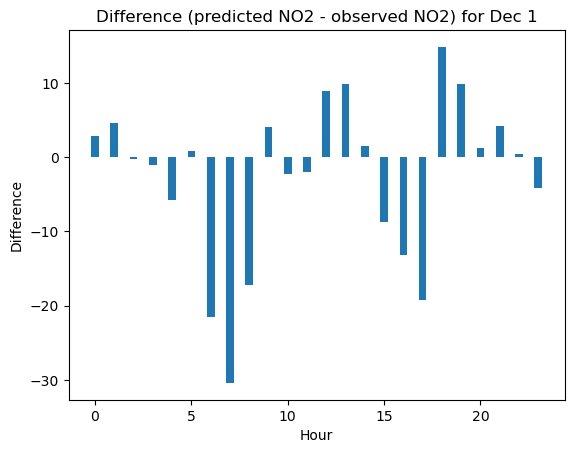

In [24]:
# plot the difference (predicted NO2 - observed NO2) for the first day
plt.bar(np.arange(0,24,1), (y_pred_ridge[:24]-y_te[:24]), width = 0.4)

plt.title('Difference (predicted NO2 - observed NO2) for Dec 1')
plt.xlabel('Hour')
plt.ylabel('Difference')
plt.show()

Bar plot with differences between predicted NO2 and observed NO2 on Friday, December 1, show significant underpredictions (up to -30 µg/m3) from 6:00 to 9:00 and from 15:00 to 17:00, when there is more traffic in Zurich. Overpredictions are from 12:00 to 13:00 and from 18:00 to 19:00. 

In [25]:
# dataframe with observed NO2 and predicted NO2

# convert observed NO2 (y_te) to dataframe
df_diff = y_te.to_frame()

# add column with predicted NO2
df_diff['NO2_pred'] = y_pred_ridge.tolist()

# calculate the difference: NO2 predicted - NO2 observed
df_diff['Diff'] = df_diff['NO2_pred'] - df_diff['NO2']

# add time feature (hour)
df_diff['Hour'] = df_diff.index.hour

# add time feature (day)
df_diff["Day"] = df_diff.index.day

In [26]:
# show first 5 entries
df_diff.head()

,NO2,NO2_pred,Diff,Hour,Day
Timestamp,,,,,
2017-12-01 00:00:00,15.28,18.097978,2.817978,0,1
2017-12-01 01:00:00,9.08,13.694136,4.614136,1,1
2017-12-01 02:00:00,9.02,8.819335,-0.200665,2,1
2017-12-01 03:00:00,10.20,9.151402,-1.048598,3,1
2017-12-01 04:00:00,17.17,11.470673,-5.699327,4,1


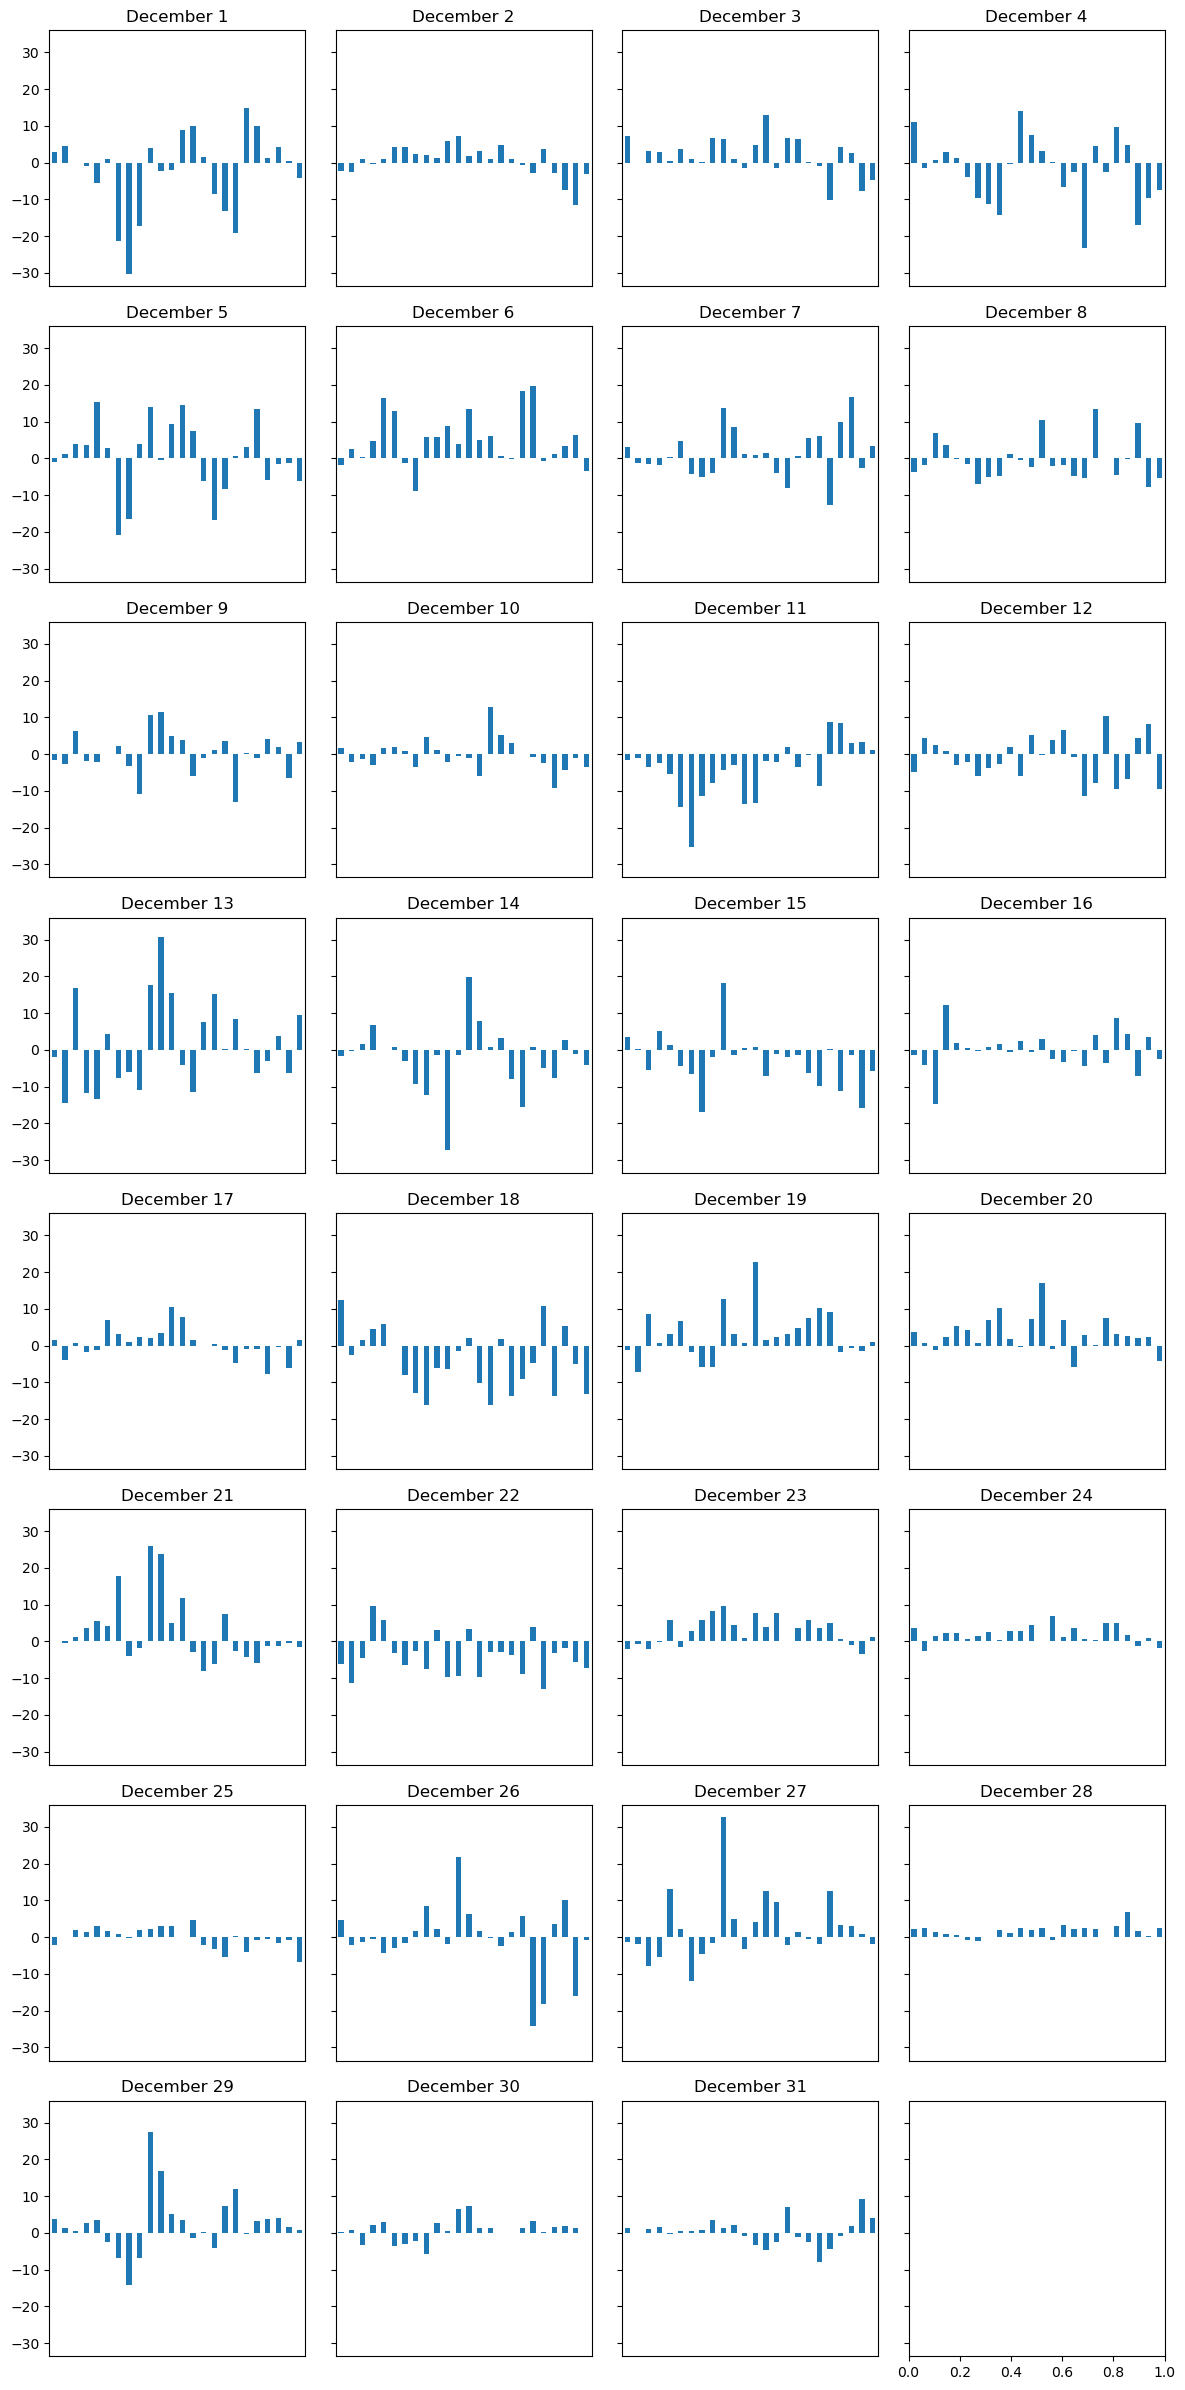

In [27]:
# plot the difference (predicted NO2 - observed NO2) for the whole test set 

# defining the number of subplots and setting the size
fig, axes = plt.subplots(nrows=8, ncols=4, sharey=True, figsize=(12, 24))

for i in range(8):
    for j in range(4):
        day = 4*i+j+1
        if (day < 32):
            df_diff[df_diff['Day']==day]['Diff'].plot(ax=axes[i,j], kind='bar')
            axes[i,j].set_title("December " + str(day))
            axes[i,j].get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()

Bar plots with the difference between predicted NO2 and observed NO2 for the whole month of December show mainly underpredictions on working days during the morning hours from 6:00 to 8:00, when there is more traffic in Zurich.

On weekends (December 2, 3, 9, 10, 16, 17, 23, 24, 30, 31) differences between predicted NO2 and observed NO2 are not that high as on working days.

December 23 and 24 show mainly small overpredictions. This was the weekend before public holidays on December 25 and 26, and one would expect less traffic in Zurich. Therefore, overpredictions are understandable.

The model was trained on the train set from January to November, which makes December predictions harder. A larger training dataset of at least a year should provide better results. 

### 4) Summary

Ridge regression model was trained and tuned on the train set (11 months) and predictions were made on the test set (1 month).

First, one-hot encoding was applied to 3 features, rain duration (RainDur), public holiday (PH) and school holiday (SH). Then, using a pipeline, standard scaler and ridge regression were applied. Ridge regression was tuned with 20 values of hyperparameter alpha, in the range from 0.0001 to 10'000. TranformedTargetRegressor was used for the log transformation (log1p) of the target (NO2). Cross-validation object (cv) was created with the TimeSeriesSplit. The number of splits was 5 and the validation set was 1 month (24 hours multiplied by 30 days).

The optimal alpha value is 4.28. The smallest mean validation error, 5.33 µg/m3, is 3% lower than the mean training error of 5.47 µg/m3, which is usually not the case. Standard deviation of the validation error is 8x higher than the standard deviation of the training error. The cross-validation showed that the model is not robust when exposed to unseen data. 

Tuned model with the optimal alpha value was fitted on the train set and evaluated on the test set. The MAE score of the tuned ridge regression model is 4.94 µg/m3, which is 3x lower than the baseline of 15.93 µg/m3.

The first day of the test set, Friday, December 1, 2017, showed underpredictions in the morning and afternoon hours, and overpredictions around noon and in the evening.

The whole test set (December 2017) showed mainly underpredictions on working days in the morning hours.

Training the model on a larger dataset, instead of 11 months, should improve predictions.